In [1]:
# import necessary libraries
import tensorflow as tf 
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [2]:
# load the MNIST dataset, a dataset of 28x28 images of handwritten digits and their labels 
# The MNIST dataset consists of 60,000 training images and 10,000 test images.
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalize the image data and convert data types
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

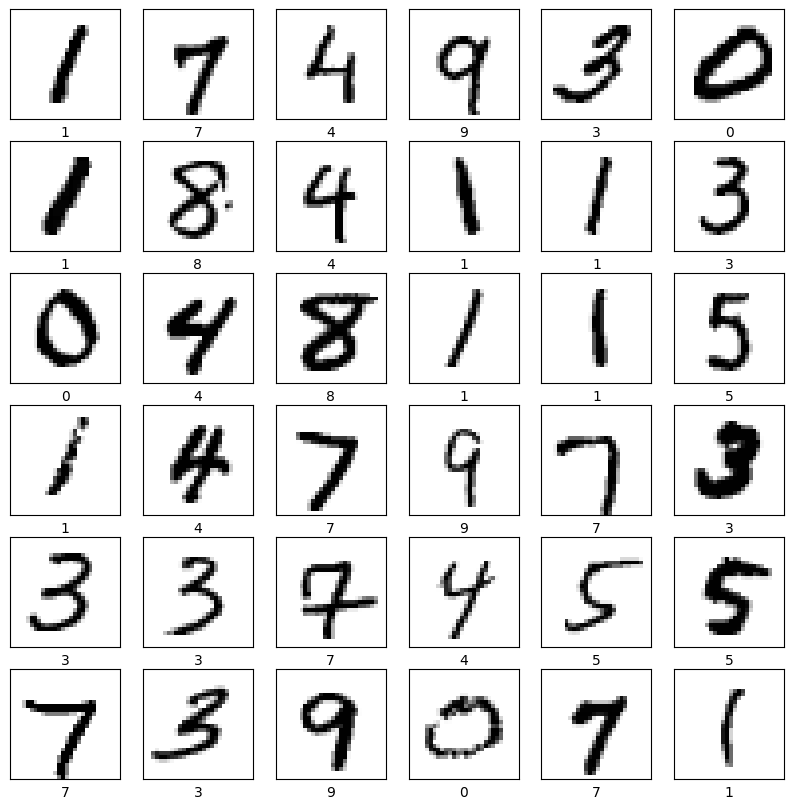

In [3]:
# plot a grid of 36 random images from the training dataset
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [4]:
# define a simple fully connected model
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),  # flatten the 2D image data to 1D
      tf.keras.layers.Dense(128, activation= tf.nn.relu),  # dense layer with ReLU activation
      tf.keras.layers.Dense(10, activation= tf.nn.softmax)  # output layer with softmax for classification
  ])
  return fc_model

In [5]:
# build and compile the model
model = build_fc_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# define the batch size and number of epochs
BATCH_SIZE = 64
EPOCHS = 5

# train the model
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)


Epoch 1/5
938/938 [==============================] - 1s 495us/step - loss: 0.3622 - accuracy: 0.9008
Epoch 2/5
938/938 [==============================] - 0s 485us/step - loss: 0.1951 - accuracy: 0.9450
Epoch 3/5
938/938 [==============================] - 0s 484us/step - loss: 0.1487 - accuracy: 0.9576
Epoch 4/5
938/938 [==============================] - 0s 478us/step - loss: 0.1207 - accuracy: 0.9658
Epoch 5/5
938/938 [==============================] - 0s 478us/step - loss: 0.1025 - accuracy: 0.9709


In [7]:
# evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 333us/step - loss: 0.1048 - accuracy: 0.9703
Test accuracy: 0.970300018787384


In [8]:
# define a convolutional neural network (CNN) model
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # First convolutional layer with ReLU activation
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # First max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # Second convolutional layer with ReLU activation
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # Second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),  # flatten the data
        tf.keras.layers.Dense(128, activation=tf.nn.relu),  # dense layer with ReLU activation
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # output layer with softmax for classification
    ])
    
    return cnn_model

# build the model and print the summary
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])  # initialize the model
print(cnn_model.summary())

1/1 [==============================] - 0s 64ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 36)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 d

In [9]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1764 - accuracy: 0.9473
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0495 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0215 - accuracy: 0.9931


In [10]:
# evaluate the model on the test dataset
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# predict the labels for the test dataset
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9906
Test accuracy: 0.9905999898910522
313/313 [==============================] - 0s 1ms/step


7
Label of this digit is: 7


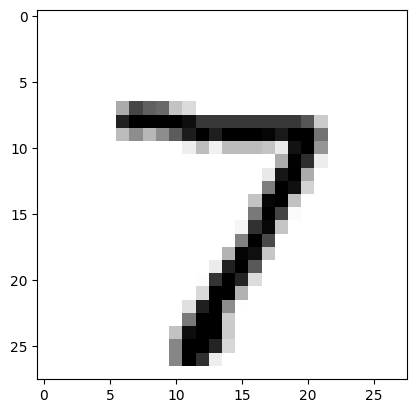

In [11]:
# print the prediction for the first image in the test dataset
prediction = np.argmax(predictions[0]) 
print(prediction)

# print the actual label of the first image in the test dataset
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

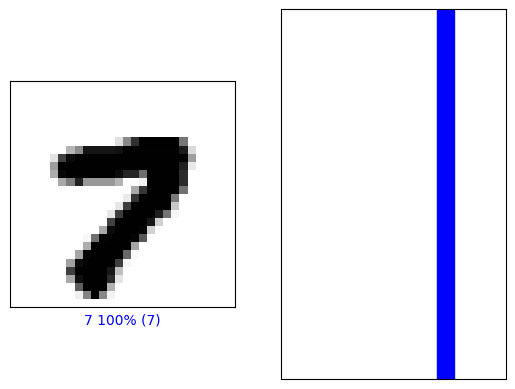

In [12]:
# plot the model's predictions and their confidence for a specific image
image_index = 79
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

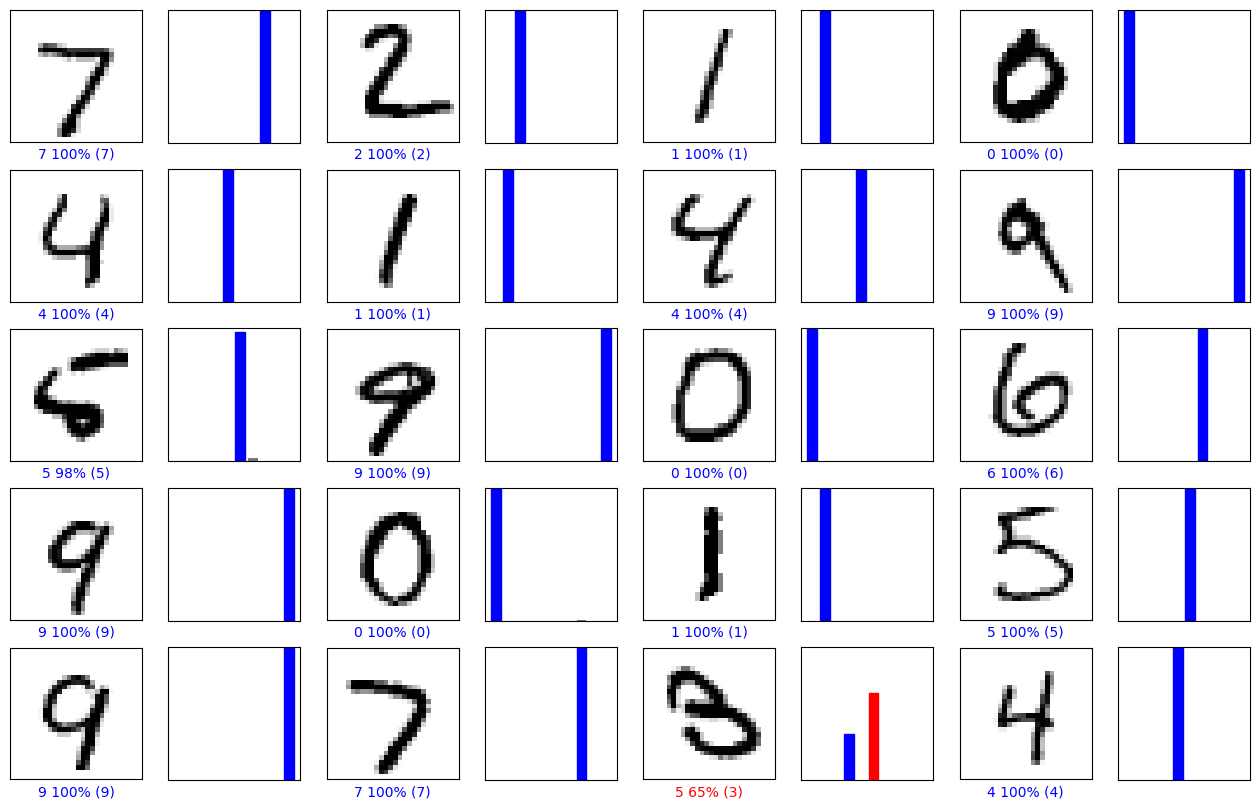

In [13]:
# plot the model's predictions and their confidence for multiple images
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

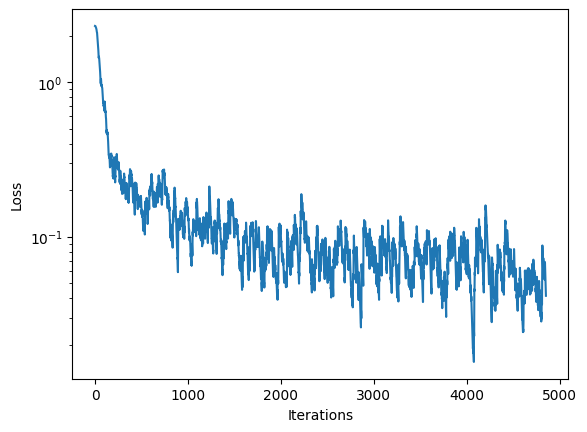

100%|██████████████████████████████████████| 5000/5000 [00:30<00:00, 165.11it/s]


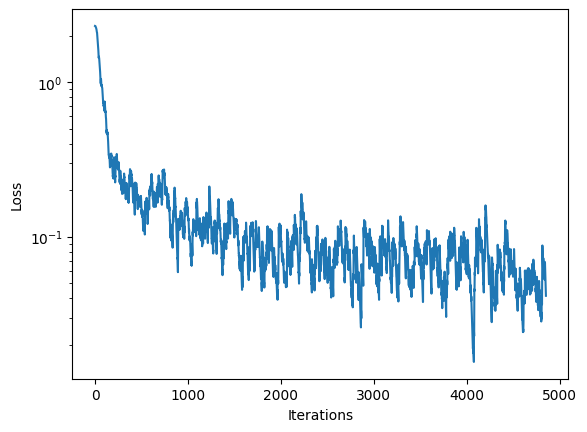

In [14]:
# rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
# loss history recorder
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
# plotter to plot the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

# clear progress bar instance if it exists
if hasattr(tqdm, '_instances'): tqdm._instances.clear()

# custom training loop
for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # open a GradientTape to record the operations run during the forward pass, which enables autodifferentiation
  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

  # record the current loss value
  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())

  # use the gradient tape to automatically retrieve the gradients of the trainable variables with respect to the loss
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)

  # run one step of gradient descent by updating the value of the variables to minimize the loss
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))